In [42]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from confusion_matrix import confusion_matrix

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_100.csv")
test_data = pd.read_csv("../ValidationData/neodata/fault_all_100.csv")
#train_data.head()

In [44]:
#adding noise
mean = 0
variance = 0

for column in train_data.drop(['target','Tset'],axis=1):
        noise = np.random.normal(mean,variance,len(train_data))
        train_data[column] += noise

#train_data

Text(0.5, 1.0, 'Training data')

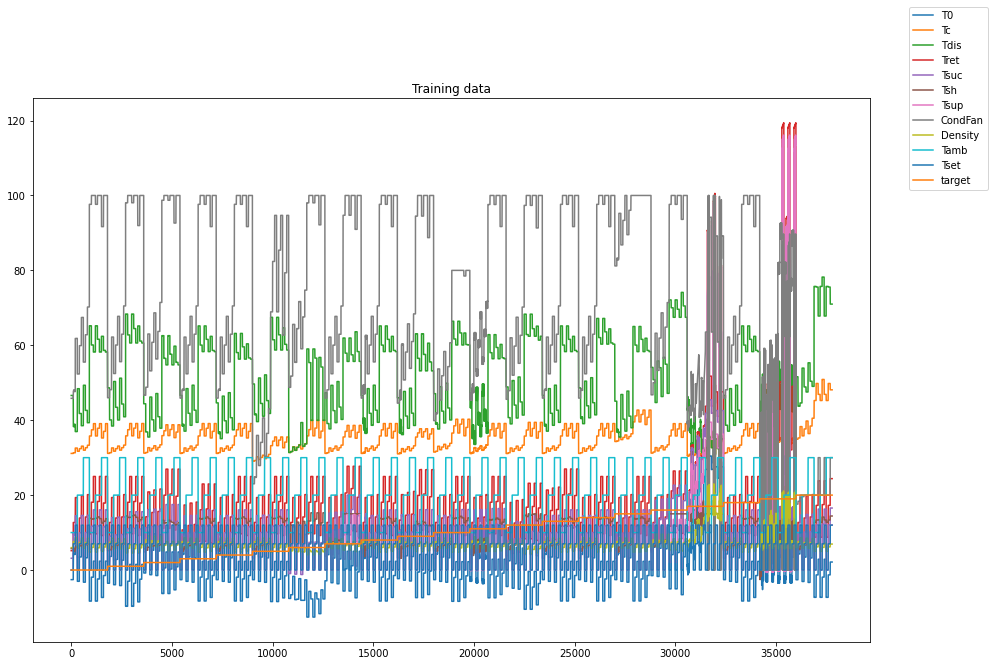

In [45]:
fig, axs = plt.subplots(figsize=(15,10))

axs.plot(train_data.drop(['Pdis','Psuc','CprPower'],axis=1))
plt.legend(train_data.drop(['Pdis','Psuc','CprPower'],axis=1).keys(), bbox_to_anchor=(1.04, 1), loc="center left")
plt.title('Training data')

In [46]:
#standardization
standardize = True

if standardize:
    import standardization as sd

    # Normalization / conditioning
    standardizer = sd.standardization(train_data,'target')

    trn = standardizer.transform(train_data)
    tst = standardizer.transform(test_data)
else:
    trn = train_data
    tst = test_data

targets = train_data['target'].unique().tolist()
labels_trn = train_data['target']
labels_tst = test_data['target']

trn

,Pdis,Psuc,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,CprPower,Density,Tamb,Tset,target
0,-1.036490,-0.474120,-0.509993,-1.093690,-0.364378,-0.909416,-0.949167,-1.088629,-0.691946,-1.041054,-0.858518,-0.461146,-1.224729,-1.286825,0
1,-1.036488,-0.474120,-0.509994,-1.093688,-0.364376,-0.909416,-0.949167,-1.088628,-0.691946,-1.041052,-0.858516,-0.461147,-1.224729,-1.286825,0
2,-1.036487,-0.474121,-0.509995,-1.093687,-0.364374,-0.909415,-0.949167,-1.088626,-0.691946,-1.041049,-0.858515,-0.461148,-1.224729,-1.286825,0
3,-1.036485,-0.474122,-0.509996,-1.093685,-0.364372,-0.909415,-0.949167,-1.088624,-0.691947,-1.041047,-0.858513,-0.461148,-1.224729,-1.286825,0
4,-1.036484,-0.474122,-0.509996,-1.093684,-0.364370,-0.909415,-0.949167,-1.088623,-0.691947,-1.041044,-0.858512,-0.461149,-1.224729,-1.286825,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37795,3.993233,-0.051154,0.058643,3.693907,1.778531,0.386895,0.459135,0.877853,0.243095,-1.659061,1.886497,-0.064897,1.224729,1.151370,20
37796,3.993232,-0.051153,0.058644,3.693906,1.778529,0.386895,0.459135,0.877852,0.243095,-1.659061,1.886496,-0.064897,1.224729,1.151370,20
37797,3.993230,-0.051153,0.058645,3.693905,1.778528,0.386895,0.459135,0.877851,0.243095,-1.659061,1.886494,-0.064896,1.224729,1.151370,20
37798,3.993229,-0.051152,0.058646,3.693904,1.778527,0.386896,0.459135,0.877850,0.243096,-1.659061,1.886492,-0.064895,1.224729,1.151370,20


# LDA    

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(n_components=5)
clf.fit(trn,labels_trn)
LDA = clf.transform(trn)

LDA

array([[ 0.06969008, -0.14266309, -0.7777641 , -0.05835893,  0.26957533],
       [ 0.06968815, -0.14266303, -0.77776492, -0.05835705,  0.2695779 ],
       [ 0.06968621, -0.14266298, -0.77776575, -0.05835516,  0.26958047],
       ...,
       [-6.52315222, -8.28435288, -2.71278628, -2.28857393, -3.23097036],
       [-6.52315459, -8.28435448, -2.71278505, -2.2885734 , -3.23096767],
       [-6.52315696, -8.28435607, -2.71278383, -2.28857288, -3.23096497]])

# SVM

In [48]:
from sklearn import svm

clf_svm = svm.SVC( C=10000, decision_function_shape="ovr")#kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf_svm.fit(LDA, labels_trn)


SVC(C=10000)

In [49]:
#clf_svm.score(LDA,labels_trn)
predict = clf_svm.predict(LDA)

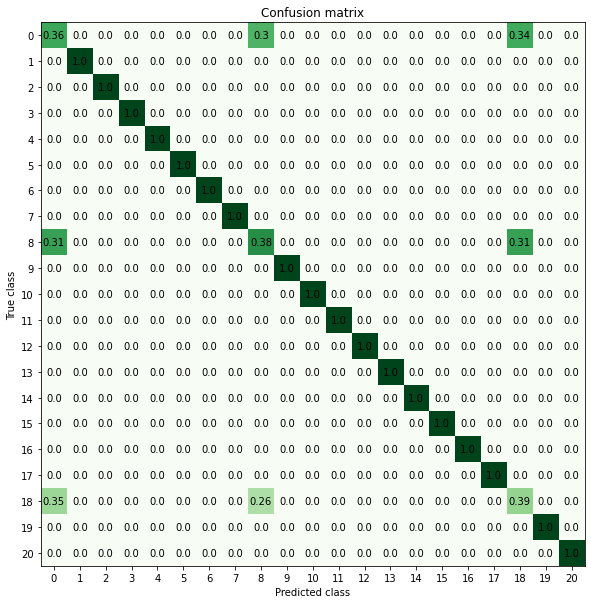

In [56]:
numbers = np.unique(labels_trn).tolist()
truth = labels_trn

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10))
pass

In [51]:
clf_svm.score(LDA,labels_trn)

0.9103174603174603